# Linear Regression of Flight Time Data


The purpose of this notebook demonstrate linear regression models in Python. 

The question modeled in this notebook is prediction of flight arrival delay based on the features 
* The departure delay.
* The airtime of flight
* The distance of flight

The data used for this project is the ontime flight data from:
* https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
* This project uses the November 2017 flight data.


##  Imports
### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### Data

In [2]:
# Read csv file into dataframe
df = pd.read_csv('267621902_T_ONTIME.csv',usecols = ['DEP_DELAY','ARR_DELAY','AIR_TIME','DISTANCE'])

## Clean the Data
There are values in this data frame with missing values.

In [3]:
df.isnull().values.any()

True

### Drop Data
In the context of this dataset, I don't know what the null values mean. For this reason they are removed from the dataset, this accounts for a drop of less than 1% of the data set.



In [4]:
n_old = df.shape[0]
print("The size of initial data is: ", n_old)
df = df.dropna()
n_new = df.shape[0]
print("The size of the data after dropping missing values is: ", n_new)
print(str.format('The percentage of data dropped is: {0:.2f}%', (n_old - n_new)/n_old*100))

The size of initial data is:  450938
The size of the data after dropping missing values is:  448911
The percentage of data dropped is: 0.45%


### Shuffle Data 
The data in this set is ordered.  In order for the the testing and training sets for linear regression to be randomized, the data is shuffled. 

In [5]:
df = df.sample(frac = 1)

##  Visualization with regression
* For this problem we can break into features and targets for the learning model.   
* The plots of the data can be visualized with a pairplot from the seaborn library to see the contributions from each feature.
* The size of the data is large so a 1% sample of the data is plotted

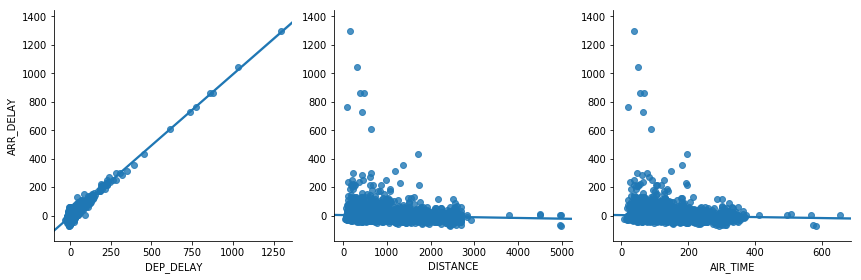

In [6]:
# Choose features and target for predictive learning model
features = ['DEP_DELAY','DISTANCE','AIR_TIME']
target = ['ARR_DELAY']

#Set up features and target data
X_data = df[features]
y_data = df[target]

#Visualize a random 1% sample of the data 
#sns.pairplot(df, x_vars = features, y_vars=target, kind='scatter', size =4)
sns.pairplot(df.sample(frac = .01), x_vars = features, y_vars=target, kind='reg', size =4) 
plt.show()


## Regression Analysis
Use the sk-learn library to break our data into testing and training sets and build a linear regression model.  Statistical results of the analysis are displayed.

In [7]:
#Split the data into testing and training sets to form a predictive model
#Uses a random selection of 30% the data in the test set, 70% in the training set 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

#Create a linear regression object
reg = linear_model.LinearRegression()

#Train the model
reg.fit(X_train, y_train)

#Use the model to predict the outcomes of our test set. 
y_pred = reg.predict(X_test)

#Get the r squared and mean square error statistical parameters
print("\nThe statistical results from applying a linear regression (features: distance, airtime and departure delay).")
print(str.format('The mean squared error on the test set is:  {0:.0f}', mean_squared_error(y_test, y_pred)))
print(str.format('The r squared value on the test set is:  {0:.2f}', r2_score(y_test, y_pred)))



The statistical results from applying a linear regression (features: distance, airtime and departure delay).
The mean squared error on the test set is:  163
The r squared value on the test set is:  0.87


### Cross Validation Analysis
Another method for computing the linear regression polynomial is through a cross-validation.   This is done using only the feature to departure delay.  This ignores the influence of airtime and distance in the analysis.  Two reasons for this are
* The plots above show arrival delay as predicted by the airtime and distance features is  0.
* The plots above for airtime and distance are very similar suggestion a potential linear relationship which violates the assumptions of linear regression.

In [8]:
#Change the features and X_data to only contain dep_delay.
features = ['DEP_DELAY']
X_data = df[features]

#Analyze data using linear regression with a 10-fold cross validation scheme
reg_cv=linear_model.LinearRegression()
print("\nThe statistical results from applying a linear regression with a 10-fold cross validation (feature: departure delay).")
mse_values = cross_val_score(reg_cv, X_data, y_data, cv=10, scoring="neg_mean_squared_error");
print(str.format('The mean squared error is:  {0:.0f}', -mse_values.mean()))
r2_values =  cross_val_score(reg_cv, X_data, y_data, cv=10, scoring="r2");
print(str.format('The r squared value is:  {0:.2f}', r2_values.mean() ))


The statistical results from applying a linear regression with a 10-fold cross validation (feature: departure delay).
The mean squared error is:  180
The r squared value is:  0.85


#### Similar Results
There isn't a statistical (MSE, r^2) difference in the two linear models.

### Strong linear correlation in Arrival and Departure Delay
Using a heatmap we can visualize the strong linear correlation in arrival delay and departure delay.  This further justifies the choice to model the data without the distance and airtime features.

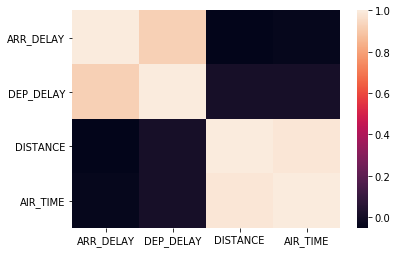

In [9]:
#Use a heat map to view the correlation matrix of different variables
features = ['ARR_DELAY', 'DEP_DELAY','DISTANCE','AIR_TIME']
sns.heatmap(df[features].corr())
plt.show()

## Summary

* Exploratory Data Analysis (cleaned and visualized data)
* Multivariable Linear Regression
* Single Variable Linear Regression with a 10-fold Cross Validations
* Heat Map to Visualize Feature Correlation



## Future Analysis

#### Do pilots make up time in the air?
* This project shows a strong linear correlation in departure delay and arrival delay.
* It also demonstrates how to use the sk-learn toolkit to model data with a linear regression analysis.


* This gives an incomplete answer to the question.
* Check out: https://fivethirtyeight.com/features/flight-delayed-your-pilot-really-can-make-up-the-time-in-the-air/ for a different analysis of this data

#### Further Linear Regression Exploration
* Regularization (Lasso/Ridge) techniques.
* Feature space reduction (PCA) techniques.